In [ ]:
import math
import numpy as np


In [ ]:
# make the grid
Nx = 101 # number of x grid points for u
xmax = 20 # x max value
xmin = 0  # x min value
dx = xmax/(Nx-1.) #x-grid width
#problema com xmin
xu = [dx*i for i in range(Nx)] # x-grid for u
C = 1 #CFL condition, 0 < C <= 1
dt = C * dx # t grid width
tmax = 1
tmin = 0
Nt = int((tmax-tmin)/dt) # number of t-grid points for u
#problema com tmin
tu = [dt*j for j in range(Nt)] #t-grid for u

In [ ]:
u0 = [math.cos(math.pi*x) for x in xu]

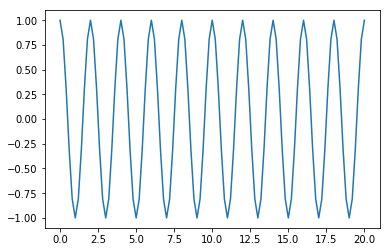

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(xu,u0)

In [27]:
# set physical parameter:
a = 1 # diffusion coefficient (?)